In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


In [2]:
df=pd.read_csv('customer_booking.csv', encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40708 entries, 1 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         40708 non-null  int64  
 1   sales_channel          40708 non-null  int64  
 2   trip_type              40708 non-null  int64  
 3   purchase_lead          40708 non-null  int64  
 4   length_of_stay         40708 non-null  int64  
 5   flight_hour            40708 non-null  int64  
 6   flight_day             40708 non-null  int64  
 7   route                  40708 non-null  int32  
 8   booking_origin         40708 non-null  int32  
 9   wants_extra_baggage    40708 non-null  int64  
 10  wants_preferred_seat   40708 non-null  int64  
 11  wants_in_flight_meals  40708 non-null  int64  
 12  flight_duration        40708 non-null  float64
 13  booking_complete       40708 non-null  int64  
dtypes: float64(1), int32(2), int64(11)
memory usage: 4.3 MB


To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

In [4]:
df_raw = df

# Preprocessing Data

#### 1. Label Encoding

In [5]:
df['flight_day'].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
days_mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df['flight_day'] = df['flight_day'].map(days_mapping)

In [7]:
df['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [8]:
channel_mapping = {
    "Internet": 1,
    "Mobile" : 0
}

df['sales_channel'] = df['sales_channel'].map(channel_mapping)

In [9]:
df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [10]:
trip_type_mapping = {
    "OneWay":1,
    "RoundTrip":2,
    "CircleTrip":3
}

df['trip_type'] =  df['trip_type'].map(trip_type_mapping)

In [11]:
df['route'].unique()

array(['AKLDEL', 'AKLHGH', 'AKLHND', 'AKLICN', 'AKLKIX', 'AKLKTM',
       'AKLKUL', 'AKLMRU', 'AKLPEK', 'AKLPVG', 'AKLTPE', 'AORICN',
       'AORKIX', 'AORKTM', 'AORMEL', 'BBIMEL', 'BBIOOL', 'BBIPER',
       'BBISYD', 'BDOCTS', 'BDOCTU', 'BDOHGH', 'BDOICN', 'BDOIKA',
       'BDOKIX', 'BDOMEL', 'BDOOOL', 'BDOPEK', 'BDOPER', 'BDOPUS',
       'BDOPVG', 'BDOSYD', 'BDOTPE', 'BDOXIY', 'BKICKG', 'BKICTS',
       'BKICTU', 'BKIHND', 'BKIICN', 'BKIKIX', 'BKIKTM', 'BKIMEL',
       'BKIMRU', 'BKIOOL', 'BKIPEK', 'BKIPER', 'BKIPUS', 'BKIPVG',
       'BKISYD', 'BKIXIY', 'BLRICN', 'BLRMEL', 'BLRPER', 'BLRSYD',
       'BOMMEL', 'BOMOOL', 'BOMPER', 'BOMSYD', 'BTJJED', 'BTUICN',
       'BTUPER', 'BTUSYD', 'BTUWUH', 'BWNCKG', 'BWNDEL', 'BWNHGH',
       'BWNIKA', 'BWNKTM', 'BWNMEL', 'BWNOOL', 'BWNPER', 'BWNSYD',
       'BWNTPE', 'CANDEL', 'CANIKA', 'CANMEL', 'CANMRU', 'CANOOL',
       'CANPER', 'CANSYD', 'CCUMEL', 'CCUMRU', 'CCUOOL', 'CCUPER',
       'CCUSYD', 'CCUTPE', 'CEBMEL', 'CEBOOL', 'CEBPER', 'CEBS

##### Since there are a lot of different route values we are uisng skitlearn to label encode

In [12]:
le = LabelEncoder()
# Fit and transform the 'route' column
df['route'] = le.fit_transform(df['route'])

# Create a mapping dictionary for documentation
route_mapping = {label: index for index, label in enumerate(le.classes_)}
print(route_mapping)


{'AKLDEL': 0, 'AKLHGH': 1, 'AKLHND': 2, 'AKLICN': 3, 'AKLKIX': 4, 'AKLKTM': 5, 'AKLKUL': 6, 'AKLMRU': 7, 'AKLPEK': 8, 'AKLPVG': 9, 'AKLTPE': 10, 'AORICN': 11, 'AORKIX': 12, 'AORKTM': 13, 'AORMEL': 14, 'AORPER': 15, 'AORPUS': 16, 'BBIMEL': 17, 'BBIOOL': 18, 'BBIPER': 19, 'BBISYD': 20, 'BDOCTS': 21, 'BDOCTU': 22, 'BDOHGH': 23, 'BDOICN': 24, 'BDOIKA': 25, 'BDOKIX': 26, 'BDOMEL': 27, 'BDOOOL': 28, 'BDOPEK': 29, 'BDOPER': 30, 'BDOPUS': 31, 'BDOPVG': 32, 'BDOSYD': 33, 'BDOTPE': 34, 'BDOWUH': 35, 'BDOXIY': 36, 'BKICKG': 37, 'BKICTS': 38, 'BKICTU': 39, 'BKIDEL': 40, 'BKIHND': 41, 'BKIICN': 42, 'BKIKIX': 43, 'BKIKTM': 44, 'BKIMEL': 45, 'BKIMRU': 46, 'BKIOOL': 47, 'BKIPEK': 48, 'BKIPER': 49, 'BKIPUS': 50, 'BKIPVG': 51, 'BKISYD': 52, 'BKIXIY': 53, 'BLRICN': 54, 'BLRMEL': 55, 'BLRPER': 56, 'BLRSYD': 57, 'BOMMEL': 58, 'BOMOOL': 59, 'BOMPER': 60, 'BOMSYD': 61, 'BTJJED': 62, 'BTUCKG': 63, 'BTUICN': 64, 'BTUPER': 65, 'BTUSYD': 66, 'BTUWUH': 67, 'BWNCKG': 68, 'BWNDEL': 69, 'BWNHGH': 70, 'BWNIKA': 71, '

In [23]:
# Fit and transform the 'booking_origin' column
df['booking_origin'] = le.fit_transform(df['booking_origin'])

# Create a mapping dictionary for documentation
route_mapping = {label: index for index, label in enumerate(le.classes_)}
print(route_mapping)

{'(not set)': 0, 'Afghanistan': 1, 'Algeria': 2, 'Argentina': 3, 'Australia': 4, 'Austria': 5, 'Bahrain': 6, 'Bangladesh': 7, 'Belarus': 8, 'Belgium': 9, 'Brazil': 10, 'Brunei': 11, 'Bulgaria': 12, 'Cambodia': 13, 'Canada': 14, 'Chile': 15, 'China': 16, 'Colombia': 17, 'Croatia': 18, 'Cyprus': 19, 'Czech Republic': 20, 'Czechia': 21, 'Denmark': 22, 'Egypt': 23, 'Estonia': 24, 'Finland': 25, 'France': 26, 'Germany': 27, 'Ghana': 28, 'Gibraltar': 29, 'Greece': 30, 'Guam': 31, 'Guatemala': 32, 'Hong Kong': 33, 'Hungary': 34, 'India': 35, 'Indonesia': 36, 'Iran': 37, 'Iraq': 38, 'Ireland': 39, 'Israel': 40, 'Italy': 41, 'Japan': 42, 'Jordan': 43, 'Kazakhstan': 44, 'Kenya': 45, 'Kuwait': 46, 'Laos': 47, 'Lebanon': 48, 'Macau': 49, 'Malaysia': 50, 'Maldives': 51, 'Mauritius': 52, 'Mexico': 53, 'Mongolia': 54, 'Myanmar (Burma)': 55, 'Nepal': 56, 'Netherlands': 57, 'New Caledonia': 58, 'New Zealand': 59, 'Nicaragua': 60, 'Norfolk Island': 61, 'Norway': 62, 'Oman': 63, 'Pakistan': 64, 'Panama':

In [13]:
df.describe()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,0.887640,1.994580,84.940480,23.04456,9.06634,3.814420,391.905800,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,0.315812,0.100154,90.451378,33.88767,5.41266,1.992792,227.297259,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,1.000000,2.000000,21.000000,5.00000,5.00000,2.000000,203.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,1.000000,2.000000,51.000000,17.00000,9.00000,4.000000,381.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,1.000000,2.000000,115.000000,28.00000,13.00000,5.000000,611.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,1.000000,3.000000,867.000000,778.00000,23.00000,7.000000,798.000000,1.000000,1.000000,1.000000,9.500000,1.000000


problems in the data:

**1. Outliers**
- `length_of_stay` = Max = 778 days, Mean = 23, Median = 17 → Likely there are outlier which needs to be removed.
- `purchase_lead` = Max = 867 days before flight → This may be unrealistic.
- `num_passenger` =  Max = 9, Mean = 1.59, Median = 1 → Higher values could be rare and affect model balance.

**2. Skewed Distribution**
- `purchase_lead`, `length_of_stay` are **right-skewed** (mean > median). *==Skewed data refers to a dataset where the distribution of values is not symmetrical, meaning the data points are not evenly distributed around the average (mean)==.*

**3. Categorical Columns Not Encoded**
These are not yet numeric, and Random Forest needs numerical values:
sales_channel (e.g., Internet, Mobile)
trip_type (e.g., RoundTrip, CircleTrip)
route (e.g., AKLDEL, AKLHGH)
booking_origin (e.g., India, New Zealand)


### Removing Outliers

In [14]:
numeric_cols = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day', 'flight_duration']


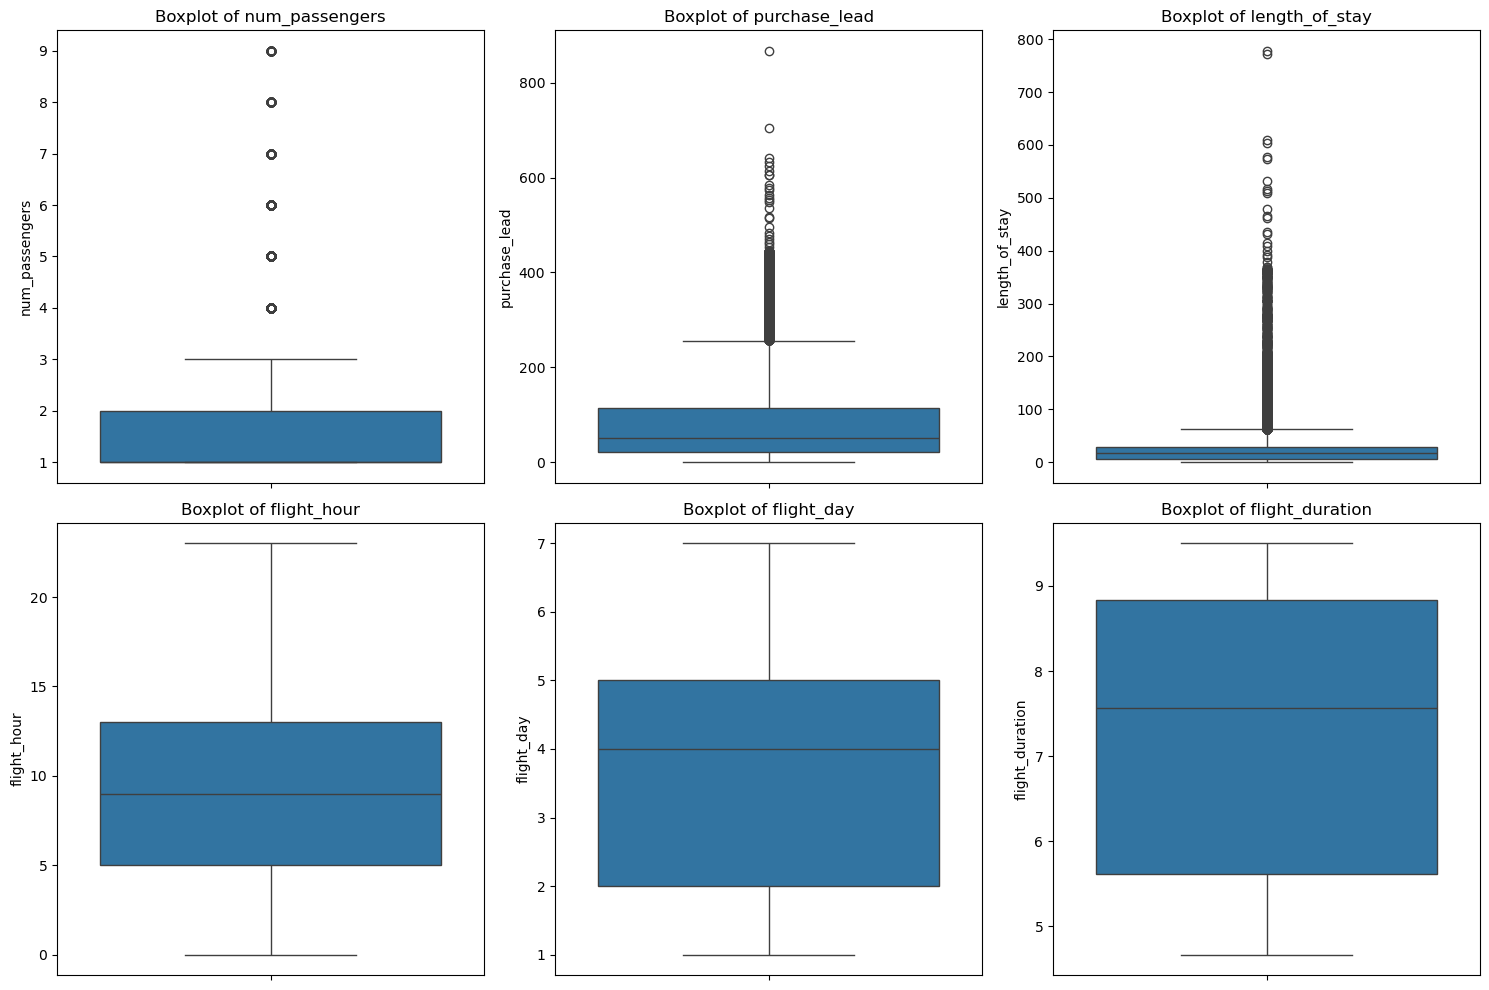

In [15]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [16]:
#function to remove Outlier using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower) & (df[column] <= upper)]
    return filtered_df


In [17]:
df = remove_outliers_iqr(df, 'purchase_lead')
df = remove_outliers_iqr(df, 'length_of_stay')
df = remove_outliers_iqr(df, 'num_passengers')


In [18]:
#rechecking the data defination
df.describe()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,40708.000000,40708.000000,40708.000000,40708.000000,40708.000000,40708.000000,40708.000000,40708.000000,40708.000000,40708.000000,40708.000000,40708.000000,40708.000000
mean,1.391496,0.883192,1.994252,66.488381,16.478948,9.059718,3.800383,397.535005,0.648472,0.293136,0.419598,7.245760,0.149135
std,0.602150,0.321195,0.100439,61.858164,14.707630,5.392429,1.967243,224.552742,0.477453,0.455206,0.493499,1.502253,0.356226
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,1.000000,2.000000,20.000000,5.000000,5.000000,2.000000,241.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,1.000000,2.000000,46.000000,6.000000,9.000000,4.000000,391.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,1.000000,2.000000,94.000000,25.000000,13.000000,5.000000,613.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,3.000000,1.000000,3.000000,256.000000,65.000000,23.000000,7.000000,798.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [19]:
df['length_of_stay'].skew()

1.1262337391342094

In [20]:
df['num_passengers'].skew()

1.2765912507829806

In [21]:
df['purchase_lead'].skew()

1.238926783617761

# Encoding Categorical Columns 

#### One Hot Encoder

In [22]:
def one_hot_encoder(df,column):
    # Initialize encoder
    encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' avoids multicollinearity
    # Fit and transform
    encoded_array = encoder.fit_transform(df[column])
    # Convert to DataFrame
    encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out([column]))
    return encoded_df



In [27]:
df.corr()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,-0.005390,0.008371,0.193334,-0.114499,0.014611,0.018463,-0.049223,0.050335,0.125803,0.049049,0.018589,-0.046603,0.024993
sales_channel,-0.005390,1.000000,-0.010153,0.016462,0.078931,-0.019219,-0.043123,0.022609,-0.026914,0.047013,-0.038499,0.017232,0.037984,0.044902
trip_type,0.008371,-0.010153,1.000000,-0.001284,0.008798,-0.003358,0.007993,-0.011154,-0.026852,-0.003718,0.009453,0.008022,-0.029360,0.017781
purchase_lead,0.193334,0.016462,-0.001284,1.000000,0.036027,0.031044,0.028090,-0.076932,0.012641,0.028040,0.015143,0.020158,0.085269,-0.030360
length_of_stay,-0.114499,0.078931,0.008798,0.036027,1.000000,-0.037262,0.005611,0.012684,-0.216012,0.252328,0.001782,0.101743,0.156637,-0.088786
flight_hour,0.014611,-0.019219,-0.003358,0.031044,-0.037262,1.000000,0.005357,-0.016450,0.043711,-0.009832,0.014495,0.015019,-0.005947,0.010748
flight_day,0.018463,-0.043123,0.007993,0.028090,0.005611,0.005357,1.000000,-0.012804,-0.011947,0.000431,0.006585,0.011150,0.013576,-0.005859
route,-0.049223,0.022609,-0.011154,-0.076932,0.012684,-0.016450,-0.012804,1.000000,-0.061750,0.020127,0.007620,-0.016194,-0.125920,-0.006035
booking_origin,0.050335,-0.026914,-0.026852,0.012641,-0.216012,0.043711,-0.011947,-0.061750,1.000000,-0.030272,-0.044693,-0.081764,-0.250905,0.136839
wants_extra_baggage,0.125803,0.047013,-0.003718,0.028040,0.252328,-0.009832,0.000431,0.020127,-0.030272,1.000000,0.203542,0.204499,0.055695,0.065448


### We find no column is highly correlated with eachother so no need to drop any column

# Train Model